<a href="https://colab.research.google.com/github/Thameera-01/AI-Model-Heart/blob/main/2_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import file
df=pd.read_csv('/content/drive/MyDrive/Logistics_Regression/cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [4]:
#data and target
dataset=df.values
data=dataset[:,0:7]
target=dataset[:,7]
print("Data shape:", data.shape)
print("Target shape:", target.shape)
print("Target:", target)



Data shape: (6644, 7)
Target shape: (6644,)
Target: [ 1.1  7.   7.  ... 30.6 23.8  1. ]


In [5]:
target=np.reshape(target, (-1,1))#convert column vector like matrix 3*1


In [6]:
print(target.shape)
print(target)

(6644, 1)
[[ 1.1]
 [ 7. ]
 [ 7. ]
 ...
 [30.6]
 [23.8]
 [ 1. ]]


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
#scaling
from sklearn.preprocessing import MinMaxScaler
target=np.reshape(target, (-1,1))

scaler_data=MinMaxScaler()
scaler_target=MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

In [9]:
print(data[:10])

[[  1.  48. 236.  66.   0.   1.   0.]
 [  0.  48. 260.  51.   0.   1.   1.]
 [  0.  44. 187.  49.   1.   1.   0.]
 [  1.  42. 216.  57.   1.   1.   0.]
 [  1.  56. 156.  42.   0.   1.   0.]
 [  0.  44. 162.  57.   1.   1.   0.]
 [  0.  50. 244.  47.   0.   1.   0.]
 [  0.  48. 212.  30.   1.   1.   0.]
 [  1.  66. 202.  53.   0.   1.   1.]
 [  0.  63. 186.  46.   1.   1.   0.]]


In [10]:
print(data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


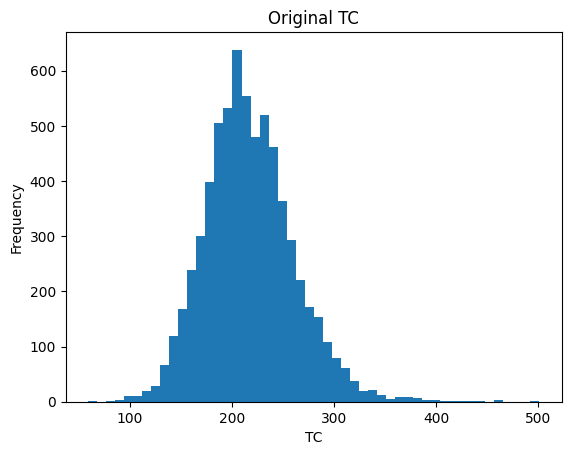

In [11]:
plt.hist(data[:,2],bins=50)
plt.title("Original TC")
plt.xlabel('TC')
plt.ylabel('Frequency')
plt.show()

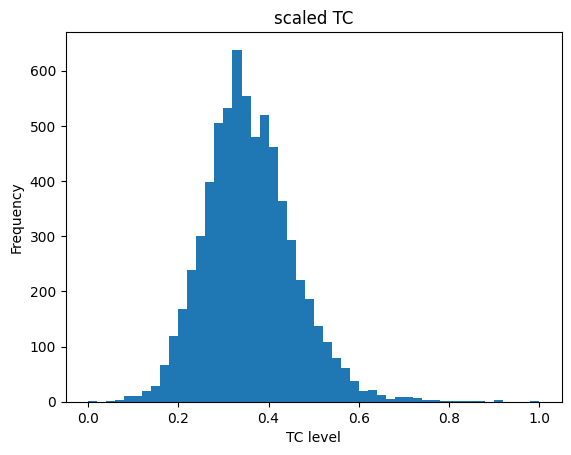

In [12]:
plt.hist(data_scaled[:,2],bins=50)
plt.title("scaled TC")
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

model=Sequential()#empty NN
model.add(Dense(200,input_dim=7,activation='relu'))#1st hidden layer


model.add(Dense(80,activation='relu'))#2nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(25,activation='relu'))#3rd hidden layer
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))#output layer

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])#calculate the lost
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         2,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,731 (77.07 KB)

 Trainable params: 19,731 (77.07 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('models/model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled, test_size=0.2, random_state=42)

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Train Target Shape:", train_target.shape)
print("Test Target Shape:", test_target.shape)

#validation
History=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=200,callbacks=[checkpoint])

Train Data Shape: (5315, 7)
Test Data Shape: (1329, 7)
Train Target Shape: (5315, 1)
Test Target Shape: (1329, 1)
Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 3/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 4/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 5/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 6/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 8/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

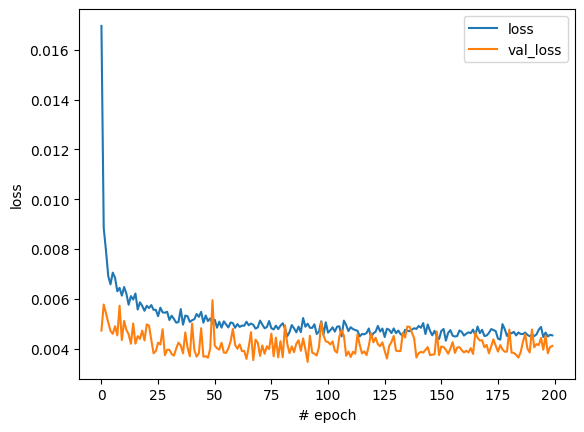

In [16]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.show()

In [17]:
#R2 score
from sklearn.metrics import r2_score
y_pred=model.predict(test_data)
r2 = r2_score(test_target,y_pred)
print('r2 score',r2)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
r2 score 0.8268272762162002


In [18]:
print('actual',test_target[:10].T)
print('predicted',y_pred[:10].T)

actual [[0.05627198 0.00117233 0.02461899 0.03985932 0.44783118 0.01641266
  0.0961313  0.40797186 0.05041032 0.06213365]]
predicted [[0.1041241  0.05311933 0.07654671 0.07806212 0.55280197 0.064761
  0.11811382 0.2073288  0.08918617 0.09756922]]


In [19]:
#inverse transform
print('actual inverse scaled',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled',scaler_target.inverse_transform(y_pred[:10]).T)

actual invers scaled [[ 4.9  0.2  2.2  3.5 38.3  1.5  8.3 34.9  4.4  5.4]]
predicted invers scaled [[ 8.981786   4.631079   6.6294346  6.7586985 47.254005   5.624113
  10.175109  17.785147   7.70758    8.422654 ]]


In [20]:
my_tast_data=[1,54,128,42,0,1,0]
my_tast_data=scaler_data.transform([my_tast_data])

result=model.predict(my_tast_data)
print('result:',result)
predicted= scaler_target.inverse_transform(result)

print('predicted',predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
result: [[0.06842127]]
predicted [[5.9363346]]


In [21]:
#save model
model.save('/content/drive/MyDrive/Logistics_Regression/2model.h5')

In [22]:
import joblib
joblib.dump(scaler_data,'/content/drive/MyDrive/Logistics_Regression/2scaler_data.sav')
joblib.dump(scaler_target,'/content/drive/MyDrive/Logistics_Regression/2scaler_target.sav')

['/content/drive/MyDrive/Logistics_Regression/2scaler_target.sav']

In [23]:
!pip install flask pyngrok

In [ ]:
from flask import Flask, render_template_string, request, jsonify
from pyngrok import ngrok, conf
import tensorflow as tf
import numpy as np
import joblib
import os


NGROK_TOKEN = "3920fF0Vpc5R1RdtbawQsbJjwZ3_7VZx3gtbmwBkkYEmEoWok"
conf.get_default().auth_token = NGROK_TOKEN


print("Loading Model and Scalers...")
try:
    model = tf.keras.models.load_model('/content/drive/MyDrive/Logistics_Regression/2model.h5')
    scaler_data = joblib.load('/content/drive/MyDrive/Logistics_Regression/2scaler_data.sav')
    scaler_target = joblib.load('/content/drive/MyDrive/Logistics_Regression/2scaler_target.sav')
    print("All components loaded successfully!")
except Exception as e:
    print(f"CRITICAL ERROR: {e}")

app = Flask(__name__)


common_css = """
<style>
    :root {
        --primary: #4f46e5;
        --bg: #f8fafc;
        --card: #ffffff;
        --text: #1e293b;
    }
    body {
        font-family: Tahoma, Geneva, Verdana, sans-serif;
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: var(--text);
        display: flex; justify-content: center; align-items: center;
        min-height: 100vh; margin: 0;
    }
    .container {
        background: rgba(255, 255, 255, 0.95);
        padding: 2rem; border-radius: 20px;
        box-shadow: 0 10px 25px rgba(0,0,0,0.2);
        width: 100%; max-width: 500px;
        margin: 20px;
    }
    h1 { color: var(--primary); text-align: center; margin-bottom: 1.5rem; }
    .form-group { margin-bottom: 1rem; }
    label { display: block; margin-bottom: 0.5rem; font-weight: 600; font-size: 0.9rem; }
    input, select {
        width: 100%; padding: 0.8rem; border: 1px solid #ddd;
        border-radius: 8px; box-sizing: border-box; transition: 0.3s;
    }
    input:focus { border-color: var(--primary); outline: none; box-shadow: 0 0 0 3px rgba(79, 70, 229, 0.1); }
    .btn {
        width: 100%; background: var(--primary); color: white;
        padding: 1rem; border: none; border-radius: 8px;
        font-size: 1rem; font-weight: bold; cursor: pointer;
        transition: transform 0.2s, background 0.3s; margin-top: 1rem;
    }
    .btn:hover { background: #4338ca; transform: translateY(-2px); }
    .result-card { text-align: center; }
    .score { font-size: 3rem; font-weight: 800; color: #ef4444; margin: 10px 0; }
    .back-link { display: inline-block; margin-top: 20px; color: var(--primary); text-decoration: none; }
</style>
"""


index_html = f"""
<!DOCTYPE html>
<html>
<head>
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Heart Health AI</title>
    {common_css}
</head>
<body>
    <div class="container">
        <h1>Heart Risk Predictor</h1>
        <form action="/getresults" method="POST" onsubmit="return validateForm()">
            <div class="form-group">
                <label>Full Name</label>
                <input type="text" name="name" id="name" placeholder="Enter Name" required>
            </div>
            <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px;">
                <div class="form-group">
                    <label>Gender</label>
                    <select name="gender">
                        <option value="0">Male</option>
                        <option value="1">Female</option>
                    </select>
                </div>
                <div class="form-group">
                    <label>Age</label>
                    <input type="number" name="age" required min="1" max="120">
                </div>
            </div>
            <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px;">
                <div class="form-group">
                    <label>TC (Total Cholesterol)</label>
                    <input type="number" step="any" name="tc" required>
                </div>
                <div class="form-group">
                    <label>HDL Cholesterol</label>
                    <input type="number" step="any" name="hdl" required>
                </div>
            </div>
            <div class="form-group">
                <label>Smoking Status</label>
                <select name="smoke">
                    <option value="0">Non-Smoker</option>
                    <option value="1">Active Smoker</option>
                </select>
            </div>
            <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px;">
                <div class="form-group">
                    <label>High Blood Pressure?</label>
                    <select name="bpm">
                        <option value="0">No</option>
                        <option value="1">Yes</option>
                    </select>
                </div>
                <div class="form-group">
                    <label>Diabetic?</label>
                    <select name="diab">
                        <option value="0">No</option>
                        <option value="1">Yes</option>
                    </select>
                </div>
            </div>
            <button type="submit" class="btn">Analyze Risk Profile</button>
        </form>
    </div>
    <script>
        function validateForm() {{
            const name = document.getElementById('name').value;
            if(name.length < 2) {{
                alert("Please enter a valid name");
                return false;
            }}
            return true;
        }}
    </script>
</body>
</html>
"""

@app.route('/')
def home():
    return render_template_string(index_html)

@app.route('/getresults', methods=['POST'])
def getresults():
    try:
        data = request.form
        inputs = np.array([
            float(data['gender']), float(data['age']), float(data['tc']),
            float(data['hdl']), float(data['smoke']), float(data['bpm']), float(data['diab'])
        ]).reshape(1, -1)

        # ML Processing
        test_data = scaler_data.transform(inputs)
        prediction = model.predict(test_data)
        final_prediction = scaler_target.inverse_transform(prediction)
        pred_value = float(final_prediction[0][0])

        # Determine Color/Level
        risk_color = "#10b981" if pred_value < 0.3 else "#f59e0b" if pred_value < 0.7 else "#ef4444"

        return f"""
        <!DOCTYPE html>
        <html>
        <head>
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            {common_css}
        </head>
        <body>
            <div class="container result-card">
                <h1>Analysis Complete</h1>
                <p>Results for <strong>{data['name']}</strong></p>
                <div class="score" style="color: {risk_color}">{pred_value:.2f}</div>
                <p>This score indicates the calculated risk level based on your clinical inputs.</p>
                <hr style="border: 0; border-top: 1px solid #eee; margin: 20px 0;">
                <a href="/" class="back-link">← Perform Another Test</a>
            </div>
        </body>
        </html>
        """
    except Exception as e:
        return f"<div class='container'><h2>Error</h2><p>{str(e)}</p></div>"

if __name__ == '__main__':
    ngrok.kill()
    public_url = ngrok.connect(5000).public_url
    print(f" * UI LIVE AT: {public_url}")
    app.run(port=5000)

Loading Model and Scalers...
All components loaded successfully!
 * UI LIVE AT: https://gummier-horologically-londyn.ngrok-free.dev
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [01/Feb/2026 16:29:38] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Feb/2026 16:30:56] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


INFO:werkzeug:127.0.0.1 - - [01/Feb/2026 16:31:18] "POST /getresults HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Feb/2026 16:31:27] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Feb/2026 16:34:56] "GET / HTTP/1.1" 200 -
